# Problem Set 5a (30 pts)

This is based on the Neuromatch Academy tutorial: 

https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Starter Code: Create Data

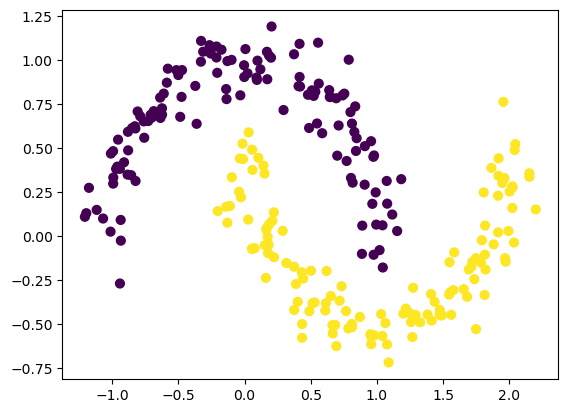

In [6]:
# Create a dataset of 256 points with a little noise
inputs, labels = make_moons(256, noise=0.1)
inputs = inputs.astype(np.float32)
labels = labels.astype(np.int64)

# Visualize the dataset 
# Color of the points is determined by labels
plt.scatter(inputs[:, 0], inputs[:, 1], s=40, c=labels)
plt.show() 

### Part 1: Implement a Multi-Layer Perceptron (MLP) class (2 pts)
Implement a class for constructing and running a MLP which inherits from the base class `nn.Module`. Please implement the `__init__`, `forward`, and `predict` methods. The `__init__` method should construct the network architecture, `forward` should perform the forward pass of the network, and `predict` should run the forward pass **and** choose the most likely label. 

In [8]:
class MLP(nn.Module):
  def __init__(self, in_size, out_size, hidden_size, act=nn.ReLU):
    super().__init__()
    net = []
    prev_dim = in_size
    for hidden in hidden_size:
      layer = nn.Linear(prev_dim, hidden)
      net.append(layer)
      net.append(act())
      prev_dim = hidden
    layer = nn.Linear(prev_dim, out_size)
    net.append(layer)
    self.net = nn.Sequential(*net)
  
  def forward(self, x):
    return self.net(x)
  
  def predict(self, x):
    with torch.no_grad():
            logits = self.forward(x)
            return torch.argmax(logits, dim=1)

### Implement a Dataset class (2 pts)
Implement a dataset class which inherits from the `Dataset` base class. This module should implement the `__init__`, `__len__`, and `__getitem__` methods. The `__init__` method should store the inputs and outputs passed via arguments to the method, the `__len__` method should return the size of the dataset, and `__getitem__` should return the datapoint at the given index passed via an argument.

In [7]:
class MyDataset(Dataset):
  def __init__(self, inputs, outputs):
    super().__init__()
    self.inputs = torch.tensor(inputs)
    self.outputs = torch.tensor(outputs)

  def __len__(self):
    return len(self.inputs)
  
  def __getitem__(self, idx):
    return self.inputs[idx], self.outputs[idx]

### Implement the Main Training Loop (8 pts)
Implement a function which iterates through a dataset and trains the model over a specified number of epochs. 

In addition to what we showed in class, create a Python list and append the current average loss at each epoch. You can compute the average loss over all the batches for a given epoch by keeping a running sum of the loss and dividing by the # of batches, which you can get with `len(dataloader)`. Be sure to zero the running sum after each epoch. Also, make sure to append only the value of the average loss to the list using `avg_loss.item()`, which returns the value of the scalar tensor as a standard Python number. 

We also want to keep track of the average magnitude of the gradients during training, which can be an important debugging tool. To get the average gradient magnitude of your network per batch, use the following function after calling the `backward()` method on your loss:

`np.mean([p.grad.norm() for p in model.parameters()])`

Just like with the loss, we want to keep a running average of this quantity each epoch as well and append it to its own separate list. Have the function return the loss and grad_norm lists after training. Additionally, display the epoch, average loss, and average grad_norm to the console every so often, where the amount is an argument to the function. This can be done with a simple `print` statement.

In [19]:
def train(dl, net, loss_fn, optimizer):
  epoch_loss = 0
  epoch_grad = 0
  for batch_inputs, batch_outputs in dl:
    optimizer.zero_grad()
    output = net(batch_inputs)
    loss = loss_fn(output, batch_outputs)
    epoch_loss += loss.item()
    loss.backward()
    epoch_grad += np.mean([p.grad.norm() for p in net.parameters()])
    optimizer.step()

  return epoch_loss / len(dl), epoch_grad / len(dl)


### Construct the Model, Dataset, and Other Bits (2 pts)
First, let's create a specific MLP using our class. Then create an optimizer (SGD) and pass the parameters of the model as an argument. Additionally, instantiate a loss function for our classification task (cross entropy loss). Finally, create a dataset using our dataset class and the Moons data we provided in the starter code. Wrap this dataset in a `DataLoader`, which will handle batching of the data for us. Please create an MLP which takes in 2 inputs (the x and y coordinates), has a single hidden layer of 16 neurons, has 2 outputs (the two possible classes), and uses ReLU activation functions. Use a learning rate of 1e-2 and a batch size of 32.

In [18]:
net = MLP(2, 2, [16])
epoch_losses = []
epoch_grads = []

optimizer = optim.SGD(net.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

inputs_tensor = torch.from_numpy(inputs)
labels_tensor = torch.from_numpy(labels)
dataset = MyDataset(inputs_tensor, labels_tensor)
dl = DataLoader(dataset)


/var/folders/7n/whhlcpf57n1ftwckm7s8t8lc0000gn/T/ipykernel_15983/1347336762.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inputs = torch.tensor(inputs)
/var/folders/7n/whhlcpf57n1ftwckm7s8t8lc0000gn/T/ipykernel_15983/1347336762.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.outputs = torch.tensor(outputs)


### Train the Model (0 pts)
Train your model using your training loop for 15000 epochs. 

In [20]:
for epoch in range(15000):
    avg_loss, avg_grad = train(dl, net, loss_fn, optimizer)
    epoch_losses.append(avg_loss)
    epoch_grads.append(avg_grad)

    if (epoch + 1) % 1500 == 0:
      print(f"Epoch {epoch+1}: avg_loss={avg_loss}, avg_grad_norm={avg_grad}")
        

Epoch 1500: avg_loss=0.019489262362217374, avg_grad_norm=0.09148370447098841
Epoch 3000: avg_loss=0.00766682973977173, avg_grad_norm=0.04348964691970725
Epoch 4500: avg_loss=0.004589666490242311, avg_grad_norm=0.02833727860396748
Epoch 6000: avg_loss=0.003214664039171533, avg_grad_norm=0.020926322587677945
Epoch 7500: avg_loss=0.0024450349349178224, avg_grad_norm=0.016410163344176734
Epoch 9000: avg_loss=0.001958261622442642, avg_grad_norm=0.013615908589342156
Epoch 10500: avg_loss=0.0016248570822756103, avg_grad_norm=0.011560581131321915
Epoch 12000: avg_loss=0.0013830826569550259, avg_grad_norm=0.009960165960206456
Epoch 13500: avg_loss=0.0012003202379996802, avg_grad_norm=0.008846427931296589
Epoch 15000: avg_loss=0.0010576943482938639, avg_grad_norm=0.007906253624936316


### Generate Average Loss Plot (4 pts)
Plot the average loss and gradient norms during training. Create two subplots with "Epoch" on the x-axis and  "Average Loss" and "Average Gradient Norm" on the y-axes, respectively. 

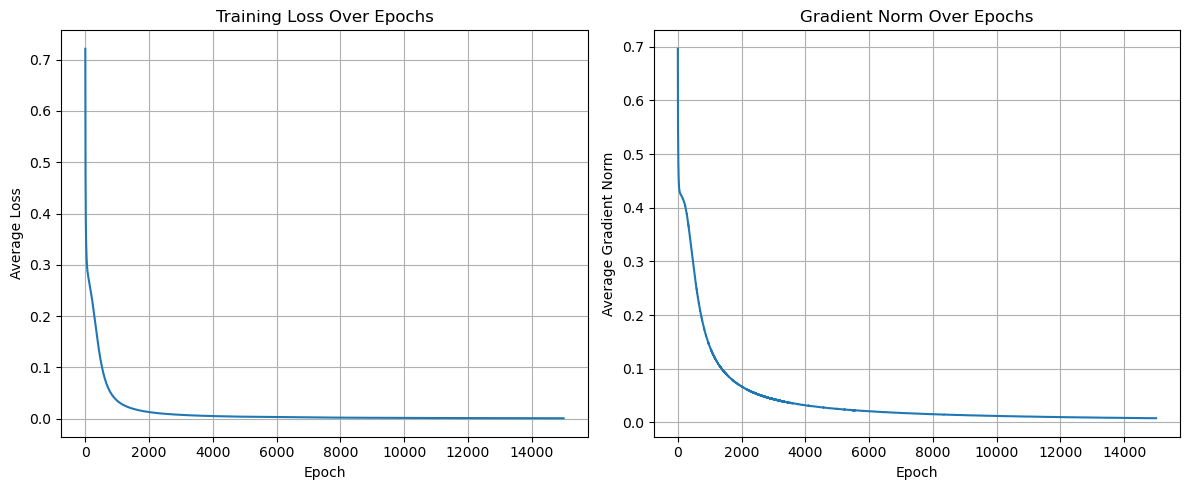

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(epoch_losses)
ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Average Loss')
ax1.grid(True)

ax2.plot(epoch_grads)
ax2.set_title('Gradient Norm Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Average Gradient Norm')
ax2.grid(True)

plt.tight_layout()
plt.show()

### Starter Code: Helper Function to Plot the Decision Boundary

In [22]:
def plot_decision_boundary(model, inputs, labels):
    # Set min and max values and give it some padding
    x_min, x_max = inputs[:, 0].min() - .5, inputs[:, 0].max() + .5
    y_min, y_max = inputs[:, 1].min() - .5, inputs[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
    grid_points = torch.tensor(grid_points).float()
    outputs = model.predict(grid_points).numpy()
    outputs = outputs.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, outputs, cmap=plt.cm.Spectral)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap=plt.cm.binary)

### Generate Decision Boundary Plot (2 pts)
Use the starter code above to plot the decision boundary of your network along with the data points.

### Hyperparameter Exploration (10pts)
Now we're going to perform some hyperparameter exploration. First, increase the learning rate by powers of 10 until the optimization either diverges or fails to converge. Then decrease the learning rate by powers of 10 until we fail to converge within the 15000 epochs (the decision boundary should be wrong). Please re-train the network for these different settings, re-generate the plots, and save them to file. You will then need to create a write-up which includes these plots and comment on the trends you see when tweaking the learning rate. We recommend that you use LaTeX, but you can use any tool you wish as long as you export it as a PDF.